In [1]:
import numpy as np
import matplotlib.pyplot as plt

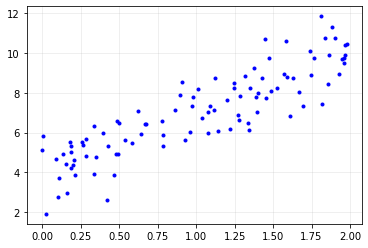

In [8]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

fig1 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(X,y,'b.')

X = np.insert(X, 0, 1, axis=1)
# X


In [22]:

def analytical_solution(X_input, y):
    val1 = np.linalg.inv(np.dot(np.transpose(X_input),X_input))
    val2 = np.dot(np.transpose(X_input),y)
    theta = np.dot(val1,val2)
    return theta

theta_optimal = analytical_solution(X, y)
print(theta_optimal)

[[3.78255465]
 [3.28072269]]


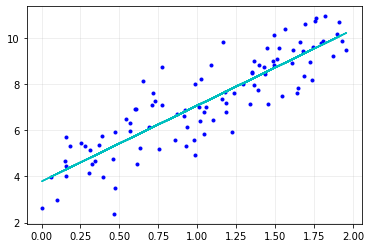

In [24]:
fig2 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(X[:,1],y,'b.')
y_analytical = np.array([theta_optimal[0]*X[:,0] + theta_optimal[1]*X[:,1]]).T
plt.plot(X[:,1],y_analytical,'c-')
plt.show()

In [25]:
def h(X,theta):
    return X.dot(theta)

m = y.shape[0]
def Cost(theta,X,y):
    return (1./(2*m))*(h(X,theta)-y).T.dot(h(X,theta)-y)

def gradient(X,y,theta):
    grad = X.T.dot(h(X,theta)-y)
    return grad

def gradientDescent(X, y, theta, alpha, num_iters):
    J_iter = np.zeros(num_iters)
    theta_iter = np.array([[],[]])
    for iter in np.arange(num_iters):
        theta = theta - alpha*(1/m)*gradient(X,y,theta)
        J_iter[iter] = Cost(theta,X,y)[0][0]
        if iter == 0:
            theta_iter = np.append(theta_iter, theta, axis = 1)
        else:
            theta_iter = np.append(theta_iter, theta, axis = 0)
    return (theta,J_iter, theta_iter)

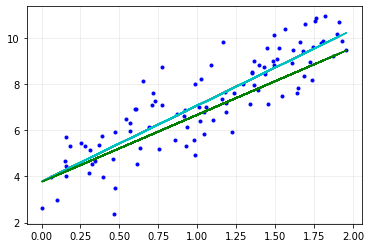

In [33]:
alpha =0.001
n_iter = 1000

theta = np.random.randn(2,1)

theta_gd,j_iter, theta_iter = gradientDescent(X,y,theta,alpha,n_iter)
y_gd = np.array([theta_gd[0]*X[:,0] + theta_gd[1]*X[:,1]]).T
fig3 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(X[:,1],y,'b.')
y_analytical = np.array([theta_optimal[0]*X[:,0] + theta_optimal[1]*X[:,1]]).T
plt.plot(X[:,1],y_analytical,'c-')
plt.plot(X[:,1],y_gd,'g-')
plt.show()

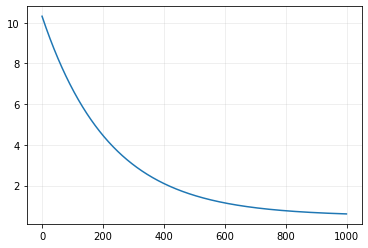

In [34]:

fig4 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(np.arange(n_iter), j_iter,'-')
plt.show()


In [36]:
def stocastic_gradient_descent(X,y,theta,alpha,num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)       
    for it in range(num_iters):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*alpha*( X_i.T.dot((prediction - y_i)))
            cost += Cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

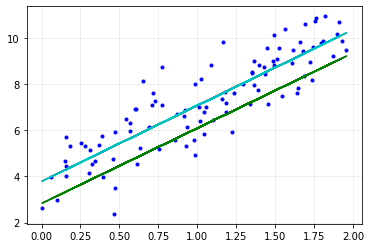

In [37]:
alpha =0.001
n_iter = 1000
theta = np.random.randn(2,1)
theta_gds,j_iter = stocastic_gradient_descent(X,y,theta,alpha,n_iter)
y_gds = np.array([theta_gds[0]*X[:,0] + theta_gds[1]*X[:,1]]).T
fig8 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(X[:,1],y,'b.')
plt.plot(X[:,1],y_analytical,'c-')
plt.plot(X[:,1],y_gds,'g-')
plt.show()

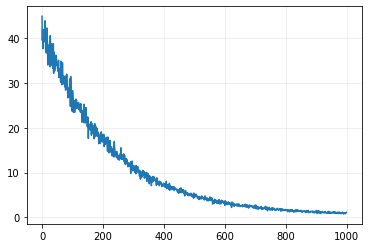

In [38]:
fig9 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(np.arange(n_iter), j_iter,'-')
plt.show()